Report 220130:

Section A: The first task is generating a tree in python. There are different packages in python able to generate a random tree. I found Toytree, ETE3, DendroPy and Ngesh capable of generating a tree. 

Toytree is able to generate a tree given its Newick information. 

In [1]:
# package toytree
import toytree

# printing given trees in Newick format using toytree
newick = "((a:1,b:1)90:3,(c:3,(d:1, e:1)100:2)100:1)100;"
toyTree = toytree.tree(newick, tree_format=0)
print(toyTree)


      /-a
   /-|
  |   \-b
--|
  |   /-c
   \-|
     |   /-d
      \-|
         \-e


Ete3 toolkit can make a tree given its Newick information, here are examples of two different trees:

In [2]:
# package ete3
from ete3 import Tree

# printing given trees in Newick format using ete3
eteTree1 = Tree("(A:1,(B:1,(E:1,D:1):0.5):0.5);" )
print(eteTree1)

eteTree2 = Tree('((((H,K)D,(F,I)G)B,E)A,((L,(N,Q)O)J,(P,S)M)C);', format=1)
print(eteTree2)


   /-A
--|
  |   /-B
   \-|
     |   /-E
      \-|
         \-D

            /-H
         /-|
        |   \-K
      /-|
     |  |   /-F
   /-|   \-|
  |  |      \-I
  |  |
  |   \-E
--|
  |      /-L
  |   /-|
  |  |  |   /-N
  |  |   \-|
   \-|      \-Q
     |
     |   /-P
      \-|
         \-S


Ete3 package is able to generate a random tree given the number of leaves:

In [3]:
# generating a random tree with 15 leaves using ete3
eteTree3 = Tree()
eteTree3.populate(15)
print(eteTree3)


            /-aaaaaaaaaj
         /-|
        |   \-aaaaaaaaak
      /-|
     |  |   /-aaaaaaaaal
     |   \-|
     |      \-aaaaaaaaam
   /-|
  |  |      /-aaaaaaaaan
  |  |   /-|
  |  |  |   \-aaaaaaaaao
  |   \-|
  |     |   /-aaaaaaaaaa
  |      \-|
--|         \-aaaaaaaaab
  |
  |      /-aaaaaaaaac
  |   /-|
  |  |  |   /-aaaaaaaaad
  |  |   \-|
  |  |     |   /-aaaaaaaaae
  |  |      \-|
   \-|        |   /-aaaaaaaaaf
     |         \-|
     |            \-aaaaaaaaag
     |
     |   /-aaaaaaaaah
      \-|
         \-aaaaaaaaai


A very comprehensive package to generate a random tree is Dendropy:

In [12]:
# generating a death birth-death tree using dendropy with 5 extant tips
from dendropy.simulate import treesim
denTree = treesim.birth_death_tree(birth_rate=1.0, death_rate=0.5, num_extant_tips=5)
denTree.print_plot()

                                                        /------------------ T1
                                     /------------------+                     
                  /------------------+                  \------------------ T5
                  |                  |                                        
/-----------------+                  \------------------------------------- T3
|                 |                                                           
+                 \-------------------------------------------------------- T2
|                                                                             
\-------------------------------------------------------------------------- T4
                                                                              
                                                                              


Another comprehensive python package used in phyologenetics is ngesh:

In [ ]:
# package ngesh 
import ngesh 

# generatin a random tree using ngesh 
ngeshTree1 = ngesh.gen_tree(min_leaves=5)
print(ngeshTree1)

# generating a radnom tree with specified birth and death parameters 
tree1 = ngesh.gen_tree(birth=1.0,death=0.5,max_time=6.0)
print(tree1)


      /-L1
   /-|
  |   \-L2
--|
  |      /-L3
  |   /-|
   \-|   \-L4
     |
      \-L5

                     /-L01
                  /-|
                 |   \-L02
                 |
                 |            /-L03
                 |         /-|
               /-|      /-|   \-L04
              |  |     |  |
              |  |   /-|   \-L05
              |  |  |  |
              |  |  |  |   /-L06
            /-|   \-|   \-|
           |  |     |      \-L07
           |  |     |
         /-|  |      \-L08
        |  |  |
        |  |   \-L09
        |  |
      /-|   \-L10
     |  |
     |  |      /-L11
     |  |   /-|
     |  |  |   \-L12
     |   \-|
   /-|     |   /-L13
  |  |      \-|
  |  |        |   /-L14
  |  |         \-|
  |  |            \-L15
--|  |
  |  |   /-L16
  |   \-|
  |      \-L17
  |
   \-L18


Section B: Simulating a simple SIR dynamic in python:
I used odeint() function to do the numerical integration as a part of the scipy package. The result was very close to the desolve() package in R. For our simple SIR model:

dS/dt = -beta*S*I
dI/dt = beta*S*I - gamma*I
dR/dt = gamma*I

My initial condition were: S= 1000, I =2, R=0
with given parameters: beta=1e-3, gamma = 1.4e-1
I just played with the parameters to make them look like an epidemy: 

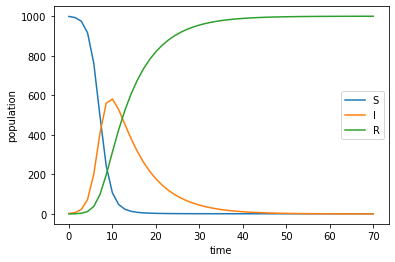

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# assigning the parameters
beta=1e-3
gamma=1.4e-1
# function that returns dY as the result of system of ODE's
def SIR(state,t,beta,gamma):
    S, I, R = state
    dS = -beta*S*I
    dI = beta*S*I - gamma*I
    dR = gamma*I
    dY = [dS,dI,dR]
    return dY

# initial condition
Y0 = [1000,2,0]

# time points
t = np.linspace(0,70)

# passing parameters to the odeint() function
p = (beta, gamma)

# solve ODE
Y = odeint(SIR,Y0,t,p)

# plot results
plt.plot(t,Y[:,0],label='S')
plt.plot(t,Y[:,1],label='I')
plt.plot(t,Y[:,2],label='R')
plt.ylabel('population')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()


Now, the challenge is fitting a tree to a SIR data. 